<a href="https://colab.research.google.com/github/Adhithya-Laxman/Image_classification/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.6/215.6 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.1 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=ea0fdc62fb64538e5efb6dcbcb33f8e4aaa326270de49916e20e6da5adcd25b2
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [2]:
# Task 1 -- Loading the datasets and the packages
from keras.datasets import fashion_mnist
from keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wandb
import random



> Plotting a sample image for each class


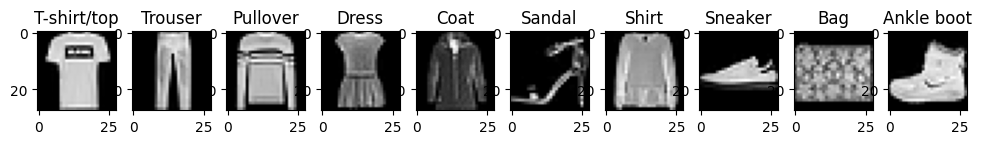

In [5]:
# Loading the dataset:

(X, y),_= fashion_mnist.load_data()
(train_images, train_labels) = (X,y)

# (X_train, Y_train),(X_test, Y_test) = fashion_mnist.load_data()
# # Defining Class Labels:

# print(X_train.shape)
# print(Y_train.shape)
# print(X_test.shape)
# print(Y_test.shape)
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress",
    "Coat", "Sandal", "Shirt", "Sneaker",
    "Bag", "Ankle boot"
]



# Plotting a sample image for each class:

plt.figure(figsize=(12,12))
for i in range(len(class_labels)):
  # Get the image data matching the current class i
  ind = np.where(train_labels == i)[0][0]
  image  = train_images[ind]
  # plot
  # plt.title("examples")
  plt.subplot(1, len(class_labels), i+1)
  plt.imshow(image,cmap = 'gray')
  plt.title(class_labels[i])
plt.show()

Preprocessing dataset

In [6]:
import numpy as np
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

def preprocess_fashion_mnist():
    # Load the Fashion-MNIST dataset
    (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

    # Flatten and normalize the input data
    X_train = X_train.reshape(-1, 28*28)  # Flatten each image to a 1D vector
    X_test = X_test.reshape(-1, 28*28)
    X_train = X_train.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
    X_test = X_test.astype('float32') / 255.0

    # One-hot encode the labels
    num_classes = 10
    y_train = np.eye(num_classes)[y_train]  # One-hot encode the training labels
    y_test = np.eye(num_classes)[y_test]    # One-hot encode the test labels

    # Split the data into training, validation, and test sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=6000, random_state=42)

    # Transpose the data to match the (features, batch_size) format expected by the function
    X_train = X_train.T
    X_val = X_val.T
    X_test = X_test.T
    # print(type(X_train))

    y_train = y_train.T
    y_val = y_val.T
    y_test = y_test.T
    # Print the number of images in X and y for training, validation, and testing datasets
    print("Number of images in the training set =", X_train.shape[1])
    print("Number of images in the validation set =", X_val.shape[1])
    print("Number of images in the test set =", X_test.shape[1])
    print("Number of classes =", num_classes)
    print("Number of features per example =", X_train.shape[0])

    return X_train, y_train, X_val, y_val, X_test, y_test

# Preprocess the Fashion-MNIST dataset
X_train, Y_train, X_val, Y_val, X_test, Y_test = preprocess_fashion_mnist()
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


Number of images in the training set = 54000
Number of images in the validation set = 6000
Number of images in the test set = 10000
Number of classes = 10
Number of features per example = 784
(784, 54000)
(10, 54000)
(784, 10000)
(10, 10000)


IMPLEMENTATION OF FEEDFORWARD NEURAL NETWORK:<br>
It takes the images from the fashion-mnist data as input and outputs a probability distribution over the 10 classes.

ACTIVATION FUNCTION AND DERIVATIVES

In [7]:
# index = random.randrange(0,X_train.shape[1])
# plt.imshow(X_train[:, index].reshape(28,28), cmap = 'gray')
# plt.show()

In [8]:
def sigmoid(x):
    return 1. / (1.+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1-sigmoid(x))

def softmax_derivative(x):
    return softmax(x) * (1-softmax(x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)
def derivative_tanh(x):
    return (1 - np.power(np.tanh(x), 2))

def derivative_relu(x):
    return np.array(x>0, dtype = np.float32)

Initializing parameters

In [9]:
# layer_dims = [X.shape[1],100,200,Y.shape[0]]
def initialize_parameters(layer_dims):
    L = len(layer_dims)
    parameters = {}
    for l in range(1,L):
#         print(L)
        parameters[f"W{l}"] = np.random.randn(layer_dims[l], layer_dims[l-1])/np.sqrt(layer_dims[l-1])  #the div is to prevent the vanishing gradient prob if the weights initialized at the beginning is too big
        parameters[f"b{l}"] = np.zeros((layer_dims[l], 1))

    return parameters

In [10]:
layer_dims = [X_train.shape[0], 100, 200, Y_train.shape[0]]
print(layer_dims)
params = initialize_parameters(layer_dims)

for l in range(1, len(layer_dims)):
    print("Shape of W" + str(l) + ":", params['W' + str(l)].shape)
    print("Shape of B" + str(l) + ":", params['b' + str(l)].shape, "\n")

[784, 100, 200, 10]
Shape of W1: (100, 784)
Shape of B1: (100, 1) 

Shape of W2: (200, 100)
Shape of B2: (200, 1) 

Shape of W3: (10, 200)
Shape of B3: (10, 1) 



In [11]:
# import numpy as np

# # Initialize parameters
# def initialize_parameters(layer_sizes, mode='xavier'):
#   np.random.seed(42)
#   parameters = {}
#   for i in range(1, len(layer_sizes)):
#     if mode == "xavier" :
#       parameters["W" + str(i)] = np.random.randn(layer_sizes[i], layer_sizes[i-1])*np.sqrt(2./(layer_sizes[i] + layer_sizes[i-1]))
#       parameters["b" + str(i)] = np.zeros((layer_sizes[i],1))
#     elif mode == "random" :
#       parameters["W" + str(i)] = 0.01*np.random.randn(layer_sizes[i], layer_sizes[i-1])
#       parameters["b" + str(i)] = 0.01*np.random.randn(layer_sizes[i],1)

#   return parameters

# def update_init(sizes) :                                  # function to initialize update dictionary that changes the weights and biases
#   update = {}
#   for i in range(1,len(sizes)):
#    update["W"+str(i)] = np.zeros((sizes[i],sizes[i-1]))
#    update["b"+str(i)] = np.zeros((sizes[i],1))

#   return update

# def update_parameters(parameters, gradients, learning_rate):
#     L = len(parameters) // 2
#     for l in range(1, L + 1):
#         parameters[f"W{l}"] -= learning_rate * gradients[f"dW{l}"]
#         parameters[f"b{l}"] -= learning_rate * gradients[f"db{l}"]

#     return parameters

# def loss_compute(y,y_hat,parameters,loss_type,reg,sizes):                                               # function to compute the loss/error (both squared error and cross entropy)

#   if (loss_type == "squared_error"):
#     error = np.sum((y-y_hat)**2)/(2*len(y))
#   elif (loss_type == "cross_entropy") :
#     error = -1*np.sum(np.multiply(y,np.log(y_hat)))/len(y)

#   reg_error = 0.0                                                                        # account for regularization to avoid overfit of data - L2 norm regularization
#   for i in range(1,len(sizes)) :
#     reg_error = reg_error + (reg/2)*(np.sum(np.square(parameters["W"+str(i)])))
#   error = error + reg_error

#   return error


FEED FORWARD NEURAL NETWORK:

Forward Propagation


In [12]:
def forward_prop(X, parameters, activation = 'relu'):
    forward_cache = {}
    L = len(parameters)//2
    forward_cache["A0"] = X

    for l in range(1, L):
        forward_cache[f"Z{l}"] = parameters[f"W{l}"].dot(forward_cache[f"A{l-1}"]) + parameters[f"b{l}"]
        if activation == 'relu':
            forward_cache[f"A{l}"] = relu(forward_cache[f"Z{l}"])
        else:
            forward_cache[f"A{l}"] = tanh(forward_cache[f"Z{l}"])


    forward_cache[f"Z{L}"] = parameters[f"W{L}"].dot(forward_cache[f"A{L-1}"]) + parameters[f"b{L}"]
    if forward_cache[f"Z{L}"].shape[0] == 1:
        forward_cache[f"A{L}"] = sigmoid(forward_cache[f"Z{L}"])
    else:
        forward_cache[f"A{L}"] = softmax(forward_cache[f"Z{L}"])

    return forward_cache[f"A{L}"], forward_cache





# def forward_propagation(X, params, layer_sizes, mode):
#     A = {}
#     H = {}
#     # Z = A, A = H
#     L = len(layer_sizes)
#     H[0] = X  # Initialize input data as A[0]
#     for k in range(1, L):
#         W = params["W" + str(k)]
#         b = params["b" + str(k)]
#         A[k] = b + np.dot(W, H[k - 1])
#         if mode == 'sigmoid':
#             H[k] = sigmoid(A[k])
#         elif mode == 'tanh':
#             H[k] = tanh(A[k])
#         elif mode == 'relu':
#             H[k] = relu(A[k])
#     W = params["W" + str(L-1)]
#     b = params["b" + str(L-1)]
#     A[L-1] = b + np.dot(W, H[L - 2])
#     y_hat = softmax(A[L-1])
#     return y_hat, H, A


# def forward_propagation(X, params, layer_sizes, mode):
#     A = {}
#     H = {}
#     # Z = A, A = H
#     L = len(layer_sizes)
#     H[0] = X  # Initialize input data as A[0]
#     for k in range(1, L):
#         W = params["W" + str(k)]
#         b = params["b" + str(k)]
#         A[k] = b + np.dot(W, H[k - 1])
#         if mode == 'sigmoid':
#             H[k] = sigmoid(A[k])
#         elif mode == 'tanh':
#             H[k] = tanh(A[k])
#         elif mode == 'relu':
#             H[k] = relu(A[k])
#     W = params["W" + str(L - 1)]
#     b = params["b" + str(L - 1)]
#     A[L - 1] = b + np.dot(W, H[L - 2])
#     y_hat = softmax(A[L - 1])
#     return y_hat, H, A


# def forward_propagation(X, params, layer_sizes, mode):
#     A = {}
#     H = {}
#     # Z = A, A = H
#     L = len(layer_sizes)
#     H[0] = X.reshape(-1, 1)  # Initialize input data as A[0]
#     for k in range(1, L):
#         W = params["W" + str(k)]
#         b = params["b" + str(k)]
#         A[k] = b + np.matmul(W, H[k - 1].reshape(-1, 1))
#         if mode == 'sigmoid':
#             H[k] = sigmoid(A[k])
#         elif mode == 'tanh':
#             H[k] = tanh(A[k])
#         elif mode == 'relu':
#             H[k] = relu(A[k])
#     W = params["W" + str(L - 1)]
#     b = params["b" + str(L - 1)]
#     A[L - 1] = b + np.dot(W, H[L - 2].reshape(-1, 1))
#     y_hat = softmax(A[L - 1])
#     return y_hat, H, A

# def forward_propagation(X, params, layer_sizes, mode):
#   A = {}
#   H = {}

#   return y_hat



In [13]:
aL, forw_cache = forward_prop(X_train, params, 'relu')

for l in range(len(params)//2 + 1):
    print("Shape of A" + str(l) + " :", forw_cache['A' + str(l)].shape)

Shape of A0 : (784, 54000)
Shape of A1 : (100, 54000)
Shape of A2 : (200, 54000)
Shape of A3 : (10, 54000)


# Cost function


In [14]:
def compute_cost(AL, Y, parameters, lambd):
    m = Y.shape[1]
    L = len(parameters)//2
    if Y.shape[0] == 1:
        cost = -(1/m) * np.sum(Y*np.log(AL) + (1-Y)*np.log(1 - AL))
    else:
        cost = -(1/m) * np.sum(Y * np.log(AL))
        # reg_sum = 0
        # for l in range(1, L):
        #   reg_sum+=np.sum(np.square(parameters[f"W{l}"]))
        # L2_reg_cost = (lambd/(2*m)) * (reg_sum)
        # cost+=L2_reg_cost
    cost = np.squeeze(cost)

    return cost

Backward Propagation

In [15]:
# def backward_propagation(AL , Y, parameters,forward_cache, activation):
#     grads = {}
#     L = len(parameters)//2
#     m = AL.shape[1]

#     grads[f"dZ{L}"] = AL - Y
#     grads[f"dW{L}"] = (1/m)*np.dot(grads[f"dZ{L}"], forward_cache[f"A{L-1}"].T)
#     grads[f"db{L}"] = (1/m)*np.sum(grads[f"dZ{L}"], axis =1, keepdims  = True)

#     for l in range(L-1, 0 , -1):
#         if activation == 'relu':
#             grads[f"dZ{l}"] = np.dot(parameters[f"W{l+1}"].T,grads[f"dZ{l+1}"]) * derivative_relu(forward_cache[f'A{l}'])
#         else:
#             grads[f"dZ{l}"] = np.dot(parameters[f"W{l+1}"].T,grads[f"dZ{l+1}"]) * derivative_tanh(forward_cache[f'A{l}'])

#         grads[f"dW{l}"] = (1/m)*np.dot(grads[f"dZ{l}"], forward_cache[f"A{l-1}"].T)
#         grads[f"db{l}"] = (1/m)*np.sum(grads[f"dZ{l}"], axis =1, keepdims  = True)

#     return grads


def backward_propagation(AL , Y, parameters,forward_cache, activation, lambd = 0.7):
    grads = {}
    L = len(parameters)//2
    m = AL.shape[1]

    grads[f"dZ{L}"] = AL - Y
    grads[f"dW{L}"] = (1/m)*np.dot(grads[f"dZ{L}"], forward_cache[f"A{L-1}"].T) + (lambd*parameters[f"W{L}"])/m
    grads[f"db{L}"] = (1/m)*np.sum(grads[f"dZ{L}"], axis =1, keepdims  = True)

    for l in range(L-1, 0 , -1):
        if activation == 'relu':
            grads[f"dZ{l}"] = np.dot(parameters[f"W{l+1}"].T,grads[f"dZ{l+1}"]) * derivative_relu(forward_cache[f'A{l}'])
        else:
            grads[f"dZ{l}"] = np.dot(parameters[f"W{l+1}"].T,grads[f"dZ{l+1}"]) * derivative_tanh(forward_cache[f'A{l}'])

        grads[f"dW{l}"] = (1/m)*np.dot(grads[f"dZ{l}"], forward_cache[f"A{l-1}"].T) + (lambd*parameters[f"W{l}"])/m
        grads[f"db{l}"] = (1/m)*np.sum(grads[f"dZ{l}"], axis =1, keepdims  = True)

    return grads


In [16]:
grads = backward_propagation(forw_cache["A" + str(3)], Y_train, params, forw_cache, 'relu', 0.7)

for l in (range(1, len(grads)//3 + 1)):
    print("Shape of dZ" + str(l) + " :", grads['dZ' + str(l)].shape)
    print("Shape of dW" + str(l) + " :", grads['dW' + str(l)].shape)
    print("Shape of dB" + str(l) + " :", grads['db' + str(l)].shape, "\n")


Shape of dZ1 : (100, 54000)
Shape of dW1 : (100, 784)
Shape of dB1 : (100, 1) 

Shape of dZ2 : (200, 54000)
Shape of dW2 : (200, 100)
Shape of dB2 : (200, 1) 

Shape of dZ3 : (10, 54000)
Shape of dW3 : (10, 200)
Shape of dB3 : (10, 1) 



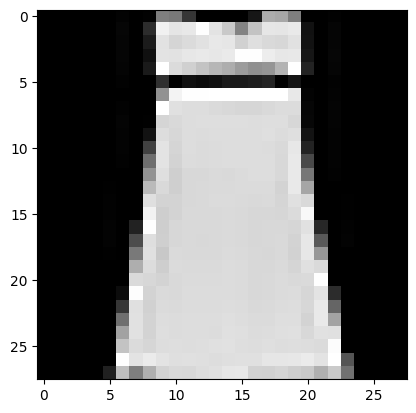

In [23]:
index = random.randrange(0,X_train.shape[1])
plt.imshow(X_train[:, index].reshape(28,28), cmap = 'gray')
plt.show()
# # Define the neural network architecture

# # Input layer (784 features), 2 hidden layers (128 and 64 neurons), Output layer (10 classes)
layer_sizes = [784, 128,32,64,10]
# parameters, train_loss_history = train(X_train, y_train, layer_sizes, mode='xavier', activation='relu', loss_type='cross_entropy', num_epochs=5, learning_rate=0.1)

# # Make predictions on the test set
# y_pred = predict(X_test, parameters, layer_sizes,activation='relu')

# # Calculate accuracy on the test set
# accuracy = np.mean(np.argmax(y_pred, axis=0) == np.argmax(y_test, axis=1))
# print("Test Accuracy:", accuracy)



In [18]:
def update_parameters(parameters, grads, learning_rate):

    L = len(parameters) // 2
    for l in range(1, L):
        parameters[f"W{l}"] = parameters[f"W{l}"] - learning_rate*grads[f'dW{l}']
        parameters[f"b{l}"] = parameters[f"b{l}"] - learning_rate*grads[f'db{l}']
    return parameters

In [19]:
def grad_desc(X, Y, layer_dims, learning_rate, activation = 'relu', n_epoch = 100, lambd = 0.7):

    parameters = initialize_parameters(layer_dims)

    for i in range(n_epoch):

        AL , forward_cache  = forward_prop(X, parameters, activation)

        cost = compute_cost(AL, Y, parameters, lambd)

        grads = backward_propagation(AL , Y, parameters,forward_cache, activation)

        parameters = update_parameters(parameters, grads, learning_rate)

        if i % (n_epoch/10) == 0:
            print("\niter:{} \t cost: {} \t train_acc:{} \t test_acc:{}".format(i, np.round(cost, 2), predict(X_train, Y_train, parameters, activation), predict(X_test, Y_test, parameters, activation)))
        if i % 10 == 0:
            print("==", end = '')

    return parameters

In [26]:
def predict(X, y, parameters, activation):

    m = X.shape[1]
    y_pred, caches = forward_prop(X, parameters, activation)

    if y.shape[0] == 1:
        y_pred = np.array(y_pred > 0.5, dtype = 'float')
    else:
        y = np.argmax(y, 0)
        y_pred = np.argmax(y_pred, 0)

    return np.round(np.sum((y_pred == y)/m), 2)*100

In [30]:
layer_dims = [X_train.shape[0], 20,10, Y_train.shape[0]]
lr = 0.005
n_epoch = 1000
activation = 'tanh'


parameters = grad_desc(X_train, Y_train, layer_dims, lr, activation = activation, n_epoch = n_epoch, lambd = 0.7)


iter:0 	 cost: 2.37 	 train_acc:11.0 	 test_acc:11.0
iter:100 	 cost: 1.97 	 train_acc:32.0 	 test_acc:32.0
iter:200 	 cost: 1.82 	 train_acc:42.0 	 test_acc:41.0
iter:300 	 cost: 1.73 	 train_acc:48.0 	 test_acc:47.0
iter:400 	 cost: 1.67 	 train_acc:54.0 	 test_acc:52.0
iter:500 	 cost: 1.61 	 train_acc:60.0 	 test_acc:59.0
iter:600 	 cost: 1.57 	 train_acc:63.0 	 test_acc:62.0
iter:700 	 cost: 1.54 	 train_acc:65.0 	 test_acc:64.0
iter:800 	 cost: 1.51 	 train_acc:66.0 	 test_acc:64.0
iter:900 	 cost: 1.48 	 train_acc:66.0 	 test_acc:65.0

In [ ]:
def update_params_momentum(parameters, grads, learning_rate, beta, prev_updates):
  L = len(parameters) // 2
  for l in range(1, L):
    prev_updates[f"W{l}"] = beta*
    parameters[f"W{l}"] = parameters[f"W{l}"] - learning_rate*grads[f'dW{l}']
    parameters[f"b{l}"] = parameters[f"b{l}"] - learning_rate*grads[f'db{l}']
  return parameters
def update_parameters_sgd(parameters, grads, learning_rate):
  pass




In [25]:
 def val_loss(y,y_hat,loss_type):                                # function to compute the loss/error (both squared error and cross entropy)
  l = 0
  if (loss_type == "squared_error"):

    l = np.sum((y-y_hat)**2)/(2*len(y))
  elif (loss_type == "cross_entropy") :
    l = -1*np.sum(np.multiply(y,np.log(y_hat)))/len(y)
  return l

def calcAccLoss(parameters, xArr, yArr, sizes, loss_type, activation, y_hat ,type="val", regu=None):
    acc = 0.0
    lossVal = 0.0
    for x, y in zip(xArr, yArr):
        # print(y_hat)
        if y_hat.argmax() == y.argmax():
            acc += 1
        if type == "val":
            lossVal += val_loss(y, y_hat.reshape(-1, 1), loss_type)
        elif type == "trng":
            lossVal += loss_compute(y, y_hat.reshape(-1, 1), parameters, loss_type, regu, sizes)
    acc = acc / len(xArr)
    return (acc, lossVal)

In [ ]:
def update_parameters_momentum(parameters, grads, learning_rate, beta, previous_updates):
    ''' Update W and b of the NN according to momentum updates

    Parameters
    ----------
    parameters: dict
        contains weights and biases of the NN

    grads: dict
        contains gradients wrt W and b returned by backpropagation

    learning_rate: float
        learning rate

    beta: float
        decay rate

    previous_updates: dict
        contains previous W and b values, accumulated in a weighted fashion along with the gradients eg.
        previous_updates[Wi] = beta*previous_updates[Wi] + (1-beta)*gradient[dWi]

    Returns
    -------
    parameters: dict
        updated NN parameters

    previous updates: dict
        updated previous updates

    '''
    L = len(parameters) // 2 # number of layers in the neural network

    for l in range(1, L + 1):
        previous_updates["W"+str(l)] = beta*previous_updates["W"+str(l)] + (1-beta)*grads["dW" + str(l)]
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate*previous_updates["W"+str(l)]

        previous_updates["b"+str(l)] = beta*previous_updates["b"+str(l)] + (1-beta)*grads["db" + str(l)]
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate*previous_updates["b"+str(l)]

    return parameters, previous_updates

Optimized GD's

In [ ]:
# Momentum GD

def update_init(sizes) :                                  # function to initialize update dictionary that changes the weights and biases
  update = {}
  for i in range(1,len(sizes)):
   update["W"+str(i)] = np.zeros((sizes[i],sizes[i-1]))
   update["b"+str(i)] = np.zeros((sizes[i],1))
  return update

def grad_init(sizes):
  grads={}
  layers=len(sizes)
  for i in range(1,layers):
    grads["dW" + str(i)] = np.zeros((sizes[i], sizes[i-1]))
    grads["db" + str(i)] = np.zeros((sizes[i],1))
  return grads

def momentum_GD(X, Y, layer_sizes, mode='xavier', activation='relu', loss_type='cross_entropy', num_epochs=5, lr=0.1, mini_batch=1, reg=1):
    steps = 0
    parameters = initialize_parameters(layer_sizes, mode)
    train_loss_history = []
    gamma = 0.9
    update = update_init(layer_sizes)
    for epoch in range(num_epochs):
        for j in range(0, X.shape[1], mini_batch):
            X_mini = X[:, j:j + mini_batch]
            Y_mini = Y[:, j:j + mini_batch]
            if Y_mini.size:
                grads = grad_init(layer_sizes)

                for col in range(X_mini.shape[1]):
                    x = X_mini[:, col].reshape(-1, 1)
                    y = Y_mini[:, col].reshape(-1, 1)
                    y_hat, H, A = forward_prop(x, parameters, layer_sizes, activation)
                    gradients = backward_propagation(x, y, H, A, y_hat, parameters, layer_sizes, activation, loss_type)

                    for i in range(1, len(layer_sizes)-1):
                        grads["dW" + str(i)] += gradients["dW" + str(i)]
                        grads["db" + str(i)] += gradients["db" + str(i)]

            for i in range(1, len(layer_sizes)):
                grads["dW" + str(i)] /= mini_batch
                grads["db" + str(i)] /= mini_batch
                update["W" + str(i)] = gamma * update["W" + str(i)] + lr * grads["dW" + str(i)]
                update["b" + str(i)] = gamma * update["b" + str(i)] + lr * grads["db" + str(i)]
                parameters["W" + str(i)] = (1 - lr * reg) * parameters["W" + str(i)] - update["W" + str(i)]
                parameters["b" + str(i)] = (1 - lr * reg) * parameters["b" + str(i)] - update["b" + str(i)]

            steps = steps + 1
            if steps == 10000:
                acc, lossTot = calcAccLoss(parameters, X, Y, layer_sizes, loss_type, activation, y_hat, type="trng", regu=reg)
                accVal, lossTotVal = calcAccLoss(parameters, X_val, Y_val, layer_sizes, loss_type, activation, y_hat)
                print( {"Accuracy": acc, "Loss": lossTot, "Accuracy_val": accVal, "Loss_val": lossTotVal, "Epoch": epoch})
                steps = 0

    return parameters
par = momentum_GD(X_train, Y_train, layer_sizes, "xavier", "sigmoid", "cross_entropy", 5, 0.1, 2, 15)
print(par)

In [ ]:
# import numpy as np
# from tensorflow.keras.datasets import fashion_mnist
# from sklearn.model_selection import train_test_split

# def preprocess_fashion_mnist():
#     # Load the Fashion-MNIST dataset
#     (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#     # Flatten and normalize the input data
#     X_train = X_train.reshape(-1, 28*28)  # Flatten each image to a 1D vector
#     X_test = X_test.reshape(-1, 28*28)
#     X_train = X_train.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
#     X_test = X_test.astype('float32') / 255.0

#     # One-hot encode the labels
#     num_classes = 10
#     y_train = np.eye(num_classes)[y_train]  # One-hot encode the training labels
#     y_test = np.eye(num_classes)[y_test]    # One-hot encode the test labels

#     # Split the data into training, validation, and test sets
#     X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=6000, random_state=42)

#     # Transpose the data to match the (features, batch_size) format expected by the function
#     X_train = X_train.T
#     X_val = X_val.T
#     X_test = X_test.T

#     # Print the number of images in X and y for training, validation, and testing datasets
#     print("Number of images in the training set =", X_train.shape[1])
#     print("Number of images in the validation set =", X_val.shape[1])
#     print("Number of images in the test set =", X_test.shape[1])
#     print("Number of classes =", num_classes)
#     print("Number of features per example =", X_train.shape[0])

#     return X_train, y_train, X_val, y_val, X_test, y_test

# # Preprocess the Fashion-MNIST dataset
# X_train, Y_train, X_val, Y_val, X_test, y_test = preprocess_fashion_mnist()

# def sigmoid(x):
#     return 1. / (1. + np.exp(-x))

# def sigmoid_derivative(x):
#     return sigmoid(x) * (1 - sigmoid(x))

# def relu(x):
#     return np.maximum(0, x)

# def relu_derivative(x):
#     return 1 * (x > 0)

# def tanh(x):
#     return np.tanh(x)

# def tanh_derivative(x):
#     return 1 - (np.tanh(x) ** 2)

# def softmax(x):
#     return np.exp(x) / np.sum(np.exp(x), axis=0)

# def softmax_derivative(x):
#     return softmax(x) * (1 - softmax(x))

# def initialize_parameters(layer_sizes, mode='xavier'):
#     np.random.seed(42)
#     parameters = {}
#     for i in range(1, len(layer_sizes)):
#         if mode == "xavier":
#             parameters["W" + str(i)] = np.random.randn(layer_sizes[i], layer_sizes[i-1]) * np.sqrt(2. / (layer_sizes[i] + layer_sizes[i-1]))
#             parameters["b" + str(i)] = np.zeros((layer_sizes[i], 1))
#         elif mode == "random":
#             parameters["W" + str(i)] = 0.01 * np.random.randn(layer_sizes[i], layer_sizes[i-1])
#             parameters["b" + str(i)] = 0.01 * np.random.randn(layer_sizes[i], 1)
#     return parameters

# def update_init(sizes):
#     update = {}
#     for i in range(1, len(sizes)):
#         update["W" + str(i)] = np.zeros((sizes[i], sizes[i-1]))
#         update["b" + str(i)] = np.zeros((sizes[i], 1))
#     return update

# def update_parameters(parameters, gradients, learning_rate):
#     L = len(parameters) // 2
#     for l in range(1, L + 1):
#         parameters[f"W{l}"] -= learning_rate * gradients[f"dW{l}"]
#         parameters[f"b{l}"] -= learning_rate * gradients[f"db{l}"]
#     return parameters

# def loss_compute(y, y_hat, parameters, loss_type, reg, sizes):
#     if loss_type == "cross_entropy":
#         error = -1 * np.sum(np.multiply(y, np.log(y_hat))) / len(y)
#     reg_error = 0.0
#     for i in range(1, len(sizes)):
#         reg_error = reg_error + (reg / 2) * (np.sum(np.square(parameters["W" + str(i)])))
#     error = error + reg_error
#     return error

# def forward_propagation(X, params, layer_sizes, mode):
#     A = {}
#     H = {}
#     L = len(layer_sizes)
#     H[0] = X.reshape(-1, 1)
#     for k in range(1, L):
#         W = params["W" + str(k)]
#         b = params["b" + str(k)]
#         A[k] = b + np.dot(W, H[k - 1].reshape(-1, 1))
#         if mode == 'sigmoid':
#             H[k] = sigmoid(A[k])
#         elif mode == 'tanh':
#             H[k] = tanh(A[k])
#         elif mode == 'relu':
#             H[k] = relu(A[k])
#     W = params["W" + str(L - 1)]
#     b = params["b" + str(L - 1)]
#     A[L - 1] = b + np.dot(W, H[L - 2].reshape(-1, 1))
#     y_hat = softmax(A[L - 1])
#     return y_hat, H, A

# def derivative(x, mode):
#     if mode == 'sigmoid':
#         return sigmoid_derivative(x)
#     elif mode == 'tanh':
#         return tanh_derivative(x)
#     elif mode == 'relu':
#         return relu_derivative(x)
#     return None

# def backward_propagation(X, Y, H, A, y_hat, params, layer_sizes, mode, loss_type):
#     L = len(layer_sizes)
#     gradients = {}
#     y_hat = y_hat.T

#     if loss_type == "cross_entropy":
#         gradients[f"dH{L - 1}"] = -(Y / y_hat)
#         gradients[f"dA{L - 1}"] = -(Y - y_hat)
#     for i in range(1, L):
#         gradients[f"dW{i}"] = np.zeros((layer_sizes[i], layer_sizes[i - 1]))
#         gradients[f"db{i}"] = np.zeros((layer_sizes[i], 1))
#         gradients[f"dA{i}"] = np.zeros((layer_sizes[i], 1))
#         gradients[f"dH{i}"] = np.zeros((layer_sizes[i], 1))

#     for k in range(L - 1, 0, -1):
#         gradients[f"dW{k}"] = np.matmul(gradients[f"dA{k}"], np.transpose(H[k - 1]))
#         gradients[f"db{k}"] = gradients[f"dA{k}"]

#         if k > 1:
#             gradients[f"dH{k - 1}"] = np.dot(np.transpose(params[f"W{k}"]), gradients[f"dA{k}"])
#             gradients[f"dA{k - 1}"] = np.multiply(gradients[f"dH{k-1}"], derivative(A[k - 1], mode))

#     return gradients

# def val_loss(y, y_hat, loss_type):
#     l = 0
#     if loss_type == "squared_error":
#         l = np.sum((y - y_hat) ** 2) / (2 * len(y))
#     elif loss_type == "cross_entropy":
#         l = -1 * np.sum(np.multiply(y, np.log(y_hat))) / len(y)
#     return l

# def calcAccLoss(parameters, xArr, yArr, sizes, loss_type, activation, y_hat, type="val", regu=None):
#     acc = 0.0
#     lossVal = 0.0
#     for x, y in zip(xArr, yArr):
#         if y_hat.argmax() == y.argmax():
#             acc += 1
#         if type == "val":
#             lossVal += val_loss(y, y_hat.reshape(-1, 1), loss_type)
#         elif type == "trng":
#             lossVal += loss_compute(y, y_hat.reshape(-1, 1), parameters, loss_type, regu, sizes)
#     acc = acc / len(xArr)
#     return acc, lossVal

# def momentum_GD(X, Y, layer_sizes, mode='xavier', activation='relu', loss_type='cross_entropy', num_epochs=5, lr=0.1, mini_batch=1, reg=1):
#     steps = 0
#     parameters = initialize_parameters(layer_sizes, mode)
#     train_loss_history = []
#     gamma = 0.9
#     update = update_init(layer_sizes)
#     for epoch in range(num_epochs):

#         for j in range(0, X.shape[1], mini_batch):
#             X_mini = X[:, j:j + mini_batch]
#             Y_mini = Y[:, j:j + mini_batch]
#             if Y_mini.size:
#                 grads = grad_init(layer_sizes)

#                 for col in range(X_mini.shape[1]):
#                     x = X_mini[:, col].reshape(-1, 1)
#                     y = Y_mini[:, col].reshape(-1, 1)
#                     y_hat, H, A = forward_propagation(x, parameters, layer_sizes, activation)
#                     gradients = backward_propagation(x, y, H, A, y_hat, parameters, layer_sizes, activation, loss_type)

#                     for i in range(1, len(layer_sizes)-1):
#                         grads["dW" + str(i)] += gradients["dW" + str(i)]
#                         grads["db" + str(i)] += gradients["db" + str(i)]



#             for i in range(1, len(layer_sizes)):
#                 grads["dW" + str(i)] /= mini_batch
#                 grads["db" + str(i)] /= mini_batch
#                 update["W" + str(i)] = gamma * update["W" + str(i)] + lr * grads["dW" + str(i)]
#                 update["b" + str(i)] = gamma * update["b" + str(i)] + lr * grads["db" + str(i)]
#                 parameters["W" + str(i)] = (1 - lr * reg) * parameters["W" + str(i)] - update["W" + str(i)]
#                 parameters["b" + str(i)] = (1 - lr * reg) * parameters["b" + str(i)] - update["b" + str(i)]

#             steps = steps + 1
#             if steps == 10000:
#                 acc, lossTot = calcAccLoss(parameters, X_train, Y_train, layer_sizes, loss_type, activation, y_hat, type="trng", regu=reg)
#                 accVal, lossTotVal = calcAccLoss(parameters, X_val, Y_val, layer_sizes, loss_type, activation, y_hat=y_hat)
#                 print({"Accuracy": acc, "Loss": lossTot, "Accuracy_val": accVal, "Loss_val": lossTotVal, "Epoch": epoch})
#                 steps = 0

#     return parameters

# # Modify the layer_sizes and other parameters as needed
# layer_sizes = [X_train.shape[0], 128, 64, 10]  # Input layer, 2 hidden layers, output layer
# par = momentum_GD(X_train, Y_train, layer_sizes, mode="xavier", activation="relu", loss_type="cross_entropy", num_epochs=20, lr=0.01, mini_batch=5, reg=0.01)


In [ ]:
# Evaluate the neural network on the test data
acc, loss = calcAccLoss(par, X_test, y_test, layer_sizes, "cross_entropy","relu", 2 )

# Print the accuracy
print("Accuracy:", acc)

In [ ]:

#Nesterov acceleracted GD
def nesterov_accelerated_GD(X, Y, layer_sizes, mode='xavier', activation='relu', loss_type='cross_entropy', num_epochs=100, lr=0.1, mini_batch=1, reg=2, log= False):
  steps = 0
  parameters = initialize_parameters(layer_sizes, mode)
  train_loss_history = []
  gamma = 0.9
  update = update_init(layer_sizes)
  for n in range(num_epochs):

    for j in range(0, X_train.shape[0], mini_batch):
      X_mini = X[:, j:j + mini_batch]
      Y_mini = Y[:, j:j + mini_batch]
      # if Y_mini.size:
      grads = grad_init(layer_sizes)
      for i in range(1,len(layer_sizes)):                                                       #perform update before back propogation
        update["W"+str(i)] = gamma*update["W"+str(i)]
        update["b"+str(i)] = gamma*update["b"+str(i)]
        parameters["W"+str(i)] = (1-lr*reg)*parameters["W"+str(i)] - update["W"+str(i)]
        parameters["b"+str(i)] = (1-lr*reg)*parameters["b"+str(i)] - update["b"+str(i)]

      for x,y in zip(X_mini,Y_mini):
        y_hat, H, A = forward_propagation(x, parameters, layer_sizes, activation)
        # H =
        gradients = backward_propagation(x, y, H, A, y_hat, parameters, layer_sizes, activation, loss_type)

      for k in range(1,len(layer_sizes)) :
        update["W"+str(k)] = gamma*update["W"+str(k)] + lr*grads["dW"+str(k)]
        update["b"+str(k)] = gamma*update["b"+str(k)] + lr*grads["db"+str(k)]
        parameters["W"+str(k)] = (1-lr*reg)*parameters["W"+str(k)] - update["W"+str(k)]
        parameters["b"+str(k)] = (1-lr*reg)*parameters["b"+str(k)] - update["b"+str(k)]
      steps=steps+1
      if steps==10000:
        if log:
          acc,lossTot=calcAccLoss(parameters,X_train,Y_train,layer_sizes,loss_type,activation,type="trng",regu=reg)
          accVal,lossTotVal=calcAccLoss(parameters,X_val,Y_val,layer_sizes,loss_type,activation)

          wandb.log({"Accuracy":acc,"Loss":lossTot,"Accuracy_val":accVal,"Loss_val":lossTotVal,"Epoch":n,"n_datatrain":j + minibatch_size+n*54000})
        steps=0

  return parameters


par = nesterov_accelerated_GD(X_train, Y_train, layer_sizes, "xavier", "relu", "cross_entropy", 5, 0.1, 1, 2, False)
print(par)


In [ ]:
# FALSE


#stochastic GD
def stochastic_GD(X_train,Y_train,activation,n_epoch,sizes,lr,reg,w_init,loss_type,minibatch_size=1,log=False) :

  steps=0
  parameters = network_init(sizes,w_init)
  update = update_init(sizes)
  gamma = 0.9
  for n in range(n_epoch):

    for j in range(0, X_train.shape[0], minibatch_size):                                        #minibatch division
      X_mini = X_train[j:j + minibatch_size]
      Y_mini = Y_train[j:j + minibatch_size]

      grads = grad_init(sizes)
      for x,y in zip(X_mini,Y_mini):
        y_hat,A,H = feed_forward(x,parameters,sizes,activation)
        grads = back_prop(x,y,y_hat,grads,A,H,parameters,sizes,loss_type,activation,reg)

      for i in range(1,len(sizes)-1) :                                                          #updating the parameters
        parameters["W"+str(i)] = (1-lr*reg)*parameters["W"+str(i)] - lr*grads["dW"+str(i)]
        parameters["b"+str(i)] = (1-lr*reg)*parameters["b"+str(i)] - lr*grads["db"+str(i)]
      steps=steps+1
      if steps==10000:
        if log:
          acc,lossTot=calcAccLoss(parameters,X_train,Y_train,sizes,loss_type,activation,type="trng",regu=reg)
          accVal,lossTotVal=calcAccLoss(parameters,X_val,Y_val,sizes,loss_type,activation)

          wandb.log({"Accuracy":acc,"Loss":lossTot,"Accuracy_val":accVal,"Loss_val":lossTotVal,"Epoch":n,"n_datatrain":j + minibatch_size+n*54000})
        steps=0

  return parameters

#rmsprop GD
def rmsprop_GD(X_train,Y_train,activation,n_epoch,sizes,lr,reg,w_init,loss_type,minibatch_size=1,log=False) :

  steps=0
  parameters = network_init(sizes,w_init)
  update = update_init(sizes)
  v = update_init(sizes)

  betal = 0.99 #check this
  eps = 1e-8

  for n in range(n_epoch):

    for j in range(0, X_train.shape[0], minibatch_size):
      X_mini = X_train[j:j + minibatch_size]
      Y_mini = Y_train[j:j + minibatch_size]

      grads = grad_init(sizes)
      for x,y in zip(X_mini,Y_mini):
        y_hat,A,H = feed_forward(x,parameters,sizes,activation)
        grads = back_prop(x,y,y_hat,grads,A,H,parameters,sizes,loss_type,activation,reg)

      for i in range(1,len(sizes)-1) :                                                                   #updating the parameters
        v["W"+str(i)] = betal*v["W"+str(i)] + (1-betal)*grads["dW"+str(i)]**2                            #v_w update
        v["b"+str(i)] = betal*v["b"+str(i)] + (1-betal)*grads["db"+str(i)]**2                            #v_b update

        update["W"+str(i)]=lr*np.multiply(np.reciprocal(np.sqrt(v["W"+str(i)]+eps)),grads["dW"+str(i)])
        update["b"+str(i)]=lr*np.multiply(np.reciprocal(np.sqrt(v["b"+str(i)]+eps)),grads["db"+str(i)])

        parameters["W"+str(i)] = (1-lr*reg)*parameters["W"+str(i)] - update["W"+str(i)]
        parameters["b"+str(i)] = (1-lr*reg)*parameters["b"+str(i)] - update["b"+str(i)]
      steps=steps+1
      if steps==10000:
        if log:
          acc,lossTot=calcAccLoss(parameters,X_train,Y_train,sizes,loss_type,activation,type="trng",regu=reg)
          accVal,lossTotVal=calcAccLoss(parameters,X_val,Y_val,sizes,loss_type,activation)

          wandb.log({"Accuracy":acc,"Loss":lossTot,"Accuracy_val":accVal,"Loss_val":lossTotVal,"Epoch":n,"n_datatrain":j + minibatch_size+n*54000})
        steps=0

  return parameters

#Adam GD
def adam_GD(X_train,Y_train,activation,n_epoch,sizes,lr,reg,w_init,loss_type,minibatch_size=1,log=False) :
  steps=0
  parameters = network_init(sizes,w_init)
  update = update_init(sizes)
  m = update_init(sizes)
  v = update_init(sizes)

  beta1 = 0.9
  beta2 = 0.999
  eps = 1e-8
  for n in range(n_epoch):

    for j in range(0, X_train.shape[0], minibatch_size):
      X_mini = X_train[j:j + minibatch_size]
      Y_mini = Y_train[j:j + minibatch_size]

      grads = grad_init(sizes)
      for x,y in zip(X_mini,Y_mini):
        y_hat,A,H = feed_forward(x,parameters,sizes,activation)
        grads = back_prop(x,y,y_hat,grads,A,H,parameters,sizes,loss_type,activation,reg)

      for i in range(1,len(sizes)-1) :                                                    #updating the parameters
        m["W"+str(i)] = beta1*m["W"+str(i)] + (1-beta1)*grads["dW"+str(i)]                #m_w update
        m["b"+str(i)] = beta1*m["b"+str(i)] + (1-beta1)*grads["db"+str(i)]                #m_b update

        v["W"+str(i)] = beta2*v["W"+str(i)] + (1-beta2)*grads["dW"+str(i)]**2             #v_w update
        v["b"+str(i)] = beta2*v["b"+str(i)] + (1-beta2)*grads["db"+str(i)]**2             #v_b update

        #cumulative average
        m_w_hat = m["W"+str(i)]/(1-np.power(beta1,n+1))
        m_b_hat = m["b"+str(i)]/(1-np.power(beta1,n+1))
        v_w_hat = v["W"+str(i)]/(1-np.power(beta2,n+1))
        v_b_hat = v["b"+str(i)]/(1-np.power(beta2,n+1))


        update["W"+str(i)]=lr*np.multiply(np.reciprocal(np.sqrt(v_w_hat+eps)),m_w_hat)
        update["b"+str(i)]=lr*np.multiply(np.reciprocal(np.sqrt(v_b_hat+eps)),m_b_hat)

        parameters["W"+str(i)] = (1-lr*reg)*parameters["W"+str(i)] - update["W"+str(i)]
        parameters["b"+str(i)] = (1-lr*reg)*parameters["b"+str(i)] - update["b"+str(i)]


      steps=steps+1
      if steps==10000:
        if log:
          acc,lossTot=calcAccLoss(parameters,X_train,Y_train,sizes,loss_type,activation,type="trng",regu=reg)
          accVal,lossTotVal=calcAccLoss(parameters,X_val,Y_val,sizes,loss_type,activation)

          wandb.log({"Accuracy":acc,"Loss":lossTot,"Accuracy_val":accVal,"Loss_val":lossTotVal,"Epoch":n,"n_datatrain":j + minibatch_size+n*54000})
        steps=0

  return parameters


#Nadam GD
def nadam_GD(X_train,Y_train,activation,n_epoch,sizes,lr,reg,w_init,loss_type,minibatch_size=1,log=False) :
  steps=0
  parameters = network_init(sizes,w_init)
  update = update_init(sizes)
  m = update_init(sizes)
  v = update_init(sizes)

  beta1 = 0.9
  beta2 = 0.999
  eps = 1e-8

  for n in range(n_epoch):

    for j in range(0, X_train.shape[0], minibatch_size):
      X_mini = X_train[j:j + minibatch_size]
      Y_mini = Y_train[j:j + minibatch_size]
      grads = grad_init(sizes)

      for x,y in zip(X_mini,Y_mini):
        y_hat,A,H = feed_forward(x,parameters,sizes,activation)
        grads = back_prop(x,y,y_hat,grads,A,H,parameters,sizes,loss_type,activation,reg)

      for i in range(1,len(sizes)-1) :                                                    #updating the parameters
        m["W"+str(i)] = beta1*m["W"+str(i)] + (1-beta1)*grads["dW"+str(i)]                #m_w update
        m["b"+str(i)] = beta1*m["b"+str(i)] + (1-beta1)*grads["db"+str(i)]                #m_b update

        v["W"+str(i)] = beta2*v["W"+str(i)] + (1-beta2)*grads["dW"+str(i)]**2             #v_w update
        v["b"+str(i)] = beta2*v["b"+str(i)] + (1-beta2)*grads["db"+str(i)]**2             #v_b update

        #cumulative average
        m_w_hat = m["W"+str(i)]/(1-np.power(beta1,n+1))
        m_b_hat = m["b"+str(i)]/(1-np.power(beta1,n+1))
        v_w_hat = v["W"+str(i)]/(1-np.power(beta2,n+1))
        v_b_hat = v["b"+str(i)]/(1-np.power(beta2,n+1))


        update["W"+str(i)]=lr*np.multiply(np.reciprocal(np.sqrt(v_w_hat+eps)),(beta1*m_w_hat+(1-beta1)*grads["dW"+str(i)]))*(1/(1-np.power(beta1,n+1)))
        update["b"+str(i)]=lr*np.multiply(np.reciprocal(np.sqrt(v_b_hat+eps)),(beta1*m_b_hat+(1-beta1)*grads["db"+str(i)]))*(1/(1-np.power(beta1,n+1)))

        parameters["W"+str(i)] = (1-lr*reg)*parameters["W"+str(i)] - update["W"+str(i)]
        parameters["b"+str(i)] = (1-lr*reg)*parameters["b"+str(i)] - update["b"+str(i)]
      steps=steps+1
      if steps==10000:
        if log:
          acc,lossTot=calcAccLoss(parameters,X_train,Y_train,sizes,loss_type,activation,type="trng",regu=reg)
          accVal,lossTotVal=calcAccLoss(parameters,X_val,Y_val,sizes,loss_type,activation)

          wandb.log({"Accuracy":acc,"Loss":lossTot,"Accuracy_val":accVal,"Loss_val":lossTotVal,"Epoch":n,"n_datatrain":j + minibatch_size+n*54000})
        steps=0

  return parameters

Execution -- Main Function
  

In [ ]:
#function to select optimizer
def do_GD(X_train,Y_train,optimizer,activation,hl_size,input_size,output_size,n_epoch,lr,reg,w_init,loss_type,minibatch_size=1,logging=False):
  sizes = hl_size.copy()
  sizes.insert(0,input_size)
  sizes.append(output_size)

  if optimizer=="sgd":
    return(stochastic_GD(X_train,Y_train,activation,n_epoch,sizes,lr,reg,w_init,loss_type,minibatch_size=1,log=logging))
  elif optimizer=="momentum":
    return(momentum_GD(X_train,Y_train,activation,n_epoch,sizes,lr,reg,w_init,loss_type,1))
  elif optimizer=="nesterov":
    return(nesterov_accelerated_GD(X_train,Y_train,activation,n_epoch,sizes,lr,reg,w_init,loss_type,minibatch_size=1,log=logging))
  elif optimizer=="rmsprop":
    return(rmsprop_GD(X_train,Y_train,activation,n_epoch,sizes,lr,reg,w_init,loss_type,minibatch_size=1,log=logging))
  elif optimizer=="adam":
    return(adam_GD(X_train,Y_train,activation,n_epoch,sizes,lr,reg,w_init,loss_type,minibatch_size=1,log=logging))
  elif optimizer=="nadam":
    return(nadam_GD(X_train,Y_train,activation,n_epoch,sizes,lr,reg,w_init,loss_type,minibatch_size=1,log=logging))


In [ ]:
#training function to sweep with wandb
def train():

  hyperparameter_defaults=dict(
      input_size = 784,
      output_size = 10,
      n_epoch = 5,
      n_hiddenlayer = 3,
      hl= [64,64,64],
      reg = 0.0005,
      lr = 1e-3,
      optimizer = "momentum",
      batch_size = 64,
      initialization = "xavier",
      loss_type = "cross_entropy"

  )

  wandb.init(config=hyperparameter_defaults)

  config=wandb.config
  output_size=10
  input_size = 784
  config.hl=[config.hl_size for i in range(config.n_hiddenlayer)]   #hidden layer sizes array creation
  parameters=do_GD(X_train, Y_train,config.optimizer,config.activation,config.hl,config.input_size,config.output_size,config.n_epoch,config.lr,config.reg,config.initialization,config.loss_type,config.batch_size,logging=True)


In [ ]:
def sweeper(sweep_config,proj_name):
  sweep_id=wandb.sweep(sweep_config,project=proj_name)
  wandb.agent(sweep_id,train,project=proj_name)

In [ ]:
#sweep dictionary
sweep_config={
    'method':'bayes',
    'metric':{
        'name':'accuracy',
        'goal':'maximize'},

}

# def momentum_GD(X, Y, layer_sizes, mode='xavier', activation='relu', loss_type='cross_entropy', num_epochs=5, lr=0.1, mini_batch=1, reg=1):


parameters_dict={
    'optimizer':{
        'values':['nadam','sgd', 'momentum', 'nesterov', 'rmsprop', 'adam']
    },
    'lr':{
        'values':[1e-3,1e-5]
    },
    'reg':{
        'values':[5e-4,0,5e-1]
    },
    'n_hiddenlayer':{
        'values':[3,4,5]
    },
    'hl_size':{
      'values':[128,32,64]
    },
    'batch_size':{
        'values':[64,32,128]
    },
    'loss_type':{
        'values':['cross_entropy','squared_error']
    },
    'initialization':{
        'values':['xavier','random']
    },
    'activation':{
        'values':['relu','sigmoid','tanh']
    },
    'n_epoch':{
        'values':[5]
    }
}
parameters_dict = {
       'optimizer':{
        'values':['momentum']
    },
    'lr':{
        'values':[1e-3,1e-5]
    },
    'reg':{
        'values':[5e-4,0,5e-1]
    },
    'n_hiddenlayer':{
        'values':[3,4,5]
    },
    'hl_size':{
      'values':[128,32,64]
    },
    'batch_size':{
        'values':[64,32,128]
    },
    'loss_type':{
        'values':['cross_entropy','squared_error']
    },
    'initialization':{
        'values':['xavier','random']
    },
    'activation':{
        'values':['relu','sigmoid','tanh']
    },
    'n_epoch':{
        'values':[5]
    }
}
sweep_config['parameters']=parameters_dict

In [ ]:
proj_name = "Image_classification"
sweep_id=wandb.sweep(sweep_config,project=proj_name)

In [ ]:
sweeper(sweep_config,proj_name)

In [ ]:
# def do_momentum_based_GD()